In [1]:
#Importando nossas bibliotesas:
from minisom import MiniSom
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from pylab import pcolor, colorbar, plot

In [2]:
#Definindo Data Set e variáveis:
base = pd.read_csv('credit_data.csv')
base = base.dropna()
base.loc[base.age < 0, 'age'] = 40.92 #Definindo todas as idades negativas no Data Set como 40.92, pois essa é a média das idades.

In [3]:
X = base.iloc[:, 0:4].values
y = base.iloc[:, 4].values

In [4]:
normalizador = MinMaxScaler(feature_range=(0,1))
X = normalizador.fit_transform(X)

In [5]:
som = MiniSom(x = 15, y = 15, input_len = 4, random_seed = 0)
som.random_weights_init(X) #Inicialização dos pesos
som.train_random(data = X, num_iteration = 100) #Modelo de treinamento, interação equivale ao número de repetições.

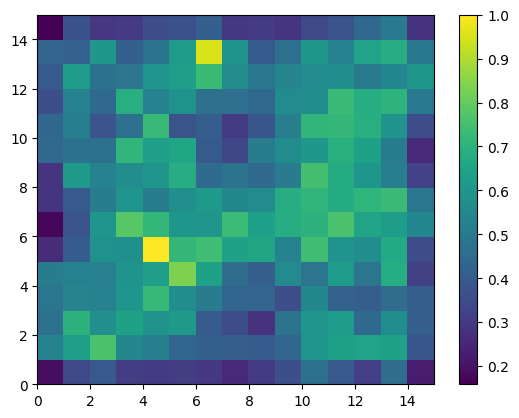

In [6]:
pcolor(som.distance_map().T)
colorbar()

In [7]:
markers = ['o', 's']
colors = ['r', 'g']

In [8]:
for i, x in enumerate(X):
    #print(i)
    #print(x)
    #Descobrir coordenada:
    w = som.winner(x)
    #print(w)
    plot(w[0] + 1 , w[1] + 1 , markers[y[i]],
         markerfacecolor = 'None', markersize = 12,
         markeredgecolor = colors[y[i]], markeredgewidth = 1,)

    
#Nosso for vai percorrer registro a registro na nossa base de dados, ele irá pegar qual é o neurônio vencedor de cada um desses registros e ele vai plotar no nosso gráfico (Se algum dos nossos neurônios vencedores escolher um neurônio amarelo ele é categorizado como um outlier)

# "i" é igual ao ID de cada registro enquanto que "x" representa passa por todas as variáveis de cada linha.

#O circulo representa os clientes que possuiram o crédito aprovado, verdes são o contrário.

In [ ]:
mapeamento = som.win_map(X) #Criando variável mapeamento que é um dicionário com noss winners.

suspeitos = np.concatenate()